In [1]:
# Librerias necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import CountVectorizer
import unicodedata

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mpvac\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mpvac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Lectura del archivo csv
df_eda = pd.read_csv(r'C:\Users\mpvac\OneDrive\Documents\Mis Repositorios\LABS\Proyecto 1\dataset_EDA.csv', low_memory=False)

# convierto ID´s en entero
df_eda['id'] = df_eda['id'].astype('int')


In [3]:
df_eda.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,status,tagline,title,vote_average,vote_count,release_year,return,cast,crew,director
0,Toy Story Collection,30000000,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,Released,NaN,Toy Story,7.7,5415.0,1995,12.451801,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",John Lasseter
1,NaN,65000000,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.043035,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Joe Johnston
2,Grumpy Old Men Collection,0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.000000,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",Howard Deutch
3,NaN,16000000,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995,5.090760,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",Forest Whitaker
4,Father of the Bride Collection,0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,...,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,0.000000,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",Charles Shyer


In [4]:
# Me quedo solo con las peliculas cuyo status sea estrenada
df_eda = df_eda[df_eda['status'] == 'Released']

In [5]:
# reviso porcentaje de datos nulos
df_eda.isnull().sum()/len(df_eda)*100

belongs_to_collection    90.057544
budget                    0.000000
genres                    0.000000
id                        0.000000
original_language         0.022218
overview                  2.015153
popularity                0.000000
production_companies      0.000000
production_countries      0.000000
release_date              0.000000
revenue                   0.000000
runtime                   0.533227
spoken_languages          0.000000
status                    0.000000
tagline                  54.866804
title                     0.000000
vote_average              0.000000
vote_count                0.000000
release_year              0.000000
return                    0.000000
cast                      0.000000
crew                      0.000000
director                  1.797418
dtype: float64

In [6]:
# Elimino columnas que no voy a utilizar muchos datos nulos
df_eda.drop(['tagline', 'belongs_to_collection', 'status'], axis=1, inplace=True)


In [7]:
# Elimino los datos nulos de las columnas que voy a utilizar
df_eda.dropna(inplace=True)

In [8]:
# vuelvo a revisar porcentaje de datos nulos
df_eda.isnull().sum()/len(df_eda)*100

budget                  0.0
genres                  0.0
id                      0.0
original_language       0.0
overview                0.0
popularity              0.0
production_companies    0.0
production_countries    0.0
release_date            0.0
revenue                 0.0
runtime                 0.0
spoken_languages        0.0
title                   0.0
vote_average            0.0
vote_count              0.0
release_year            0.0
return                  0.0
cast                    0.0
crew                    0.0
director                0.0
dtype: float64

In [9]:
# elimino duplicados
df_eda.drop_duplicates(inplace=True)
df_eda.head()

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,return,cast,crew,director
0,30000000,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81.0,['English'],Toy Story,7.7,5415.0,1995,12.451801,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",John Lasseter
1,65000000,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104.0,"['English', 'Français']",Jumanji,6.9,2413.0,1995,4.043035,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Joe Johnston
2,0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,101.0,['English'],Grumpier Old Men,6.5,92.0,1995,0.000000,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",Howard Deutch
3,16000000,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127.0,['English'],Waiting to Exhale,6.1,34.0,1995,5.090760,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",Forest Whitaker
4,0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911,106.0,['English'],Father of the Bride Part II,5.7,173.0,1995,0.000000,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",Charles Shyer


In [10]:
# normalizo las columnas
df_eda['cast'] = df_eda['cast'].apply(literal_eval)
df_eda['crew'] = df_eda['crew'].apply(literal_eval)

df_eda.head()

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,return,cast,crew,director
0,30000000,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81.0,['English'],Toy Story,7.7,5415.0,1995,12.451801,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",John Lasseter
1,65000000,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104.0,"['English', 'Français']",Jumanji,6.9,2413.0,1995,4.043035,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Joe Johnston
2,0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,101.0,['English'],Grumpier Old Men,6.5,92.0,1995,0.000000,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",Howard Deutch
3,16000000,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127.0,['English'],Waiting to Exhale,6.1,34.0,1995,5.090760,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",Forest Whitaker
4,0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911,106.0,['English'],Father of the Bride Part II,5.7,173.0,1995,0.000000,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",Charles Shyer


In [11]:
# Veo el contenido de la columna cast
df_eda['cast'][0]

[{'cast_id': 14,
  'character': 'Woody (voice)',
  'credit_id': '52fe4284c3a36847f8024f95',
  'gender': 2,
  'id': 31,
  'name': 'Tom Hanks',
  'order': 0,
  'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'},
 {'cast_id': 15,
  'character': 'Buzz Lightyear (voice)',
  'credit_id': '52fe4284c3a36847f8024f99',
  'gender': 2,
  'id': 12898,
  'name': 'Tim Allen',
  'order': 1,
  'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'},
 {'cast_id': 16,
  'character': 'Mr. Potato Head (voice)',
  'credit_id': '52fe4284c3a36847f8024f9d',
  'gender': 2,
  'id': 7167,
  'name': 'Don Rickles',
  'order': 2,
  'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'},
 {'cast_id': 17,
  'character': 'Slinky Dog (voice)',
  'credit_id': '52fe4284c3a36847f8024fa1',
  'gender': 2,
  'id': 12899,
  'name': 'Jim Varney',
  'order': 3,
  'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'},
 {'cast_id': 18,
  'character': 'Rex (voice)',
  'credit_id': '52fe4284c3a36847f8024fa5',
  'gender': 2,
  'id': 12900,
 

In [12]:
# obtengo el nombre del actor principal
df_eda['protagonista'] = df_eda['cast'].apply(lambda x: [i['name'] for i in x if i['order'] == 0])
df_eda.head()


,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,spoken_languages,title,vote_average,vote_count,release_year,return,cast,crew,director,protagonista
0,30000000,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,...,['English'],Toy Story,7.7,5415.0,1995,12.451801,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",John Lasseter,[Tom Hanks]
1,65000000,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,...,"['English', 'Français']",Jumanji,6.9,2413.0,1995,4.043035,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Joe Johnston,[Robin Williams]
2,0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,...,['English'],Grumpier Old Men,6.5,92.0,1995,0.000000,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",Howard Deutch,[Walter Matthau]
3,16000000,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,...,['English'],Waiting to Exhale,6.1,34.0,1995,5.090760,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",Forest Whitaker,[Whitney Houston]
4,0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911,...,['English'],Father of the Bride Part II,5.7,173.0,1995,0.000000,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",Charles Shyer,[Steve Martin]


In [13]:
# Veo el valor de la columna crew  
df_eda['crew'][1]

[{'credit_id': '52fe44bfc3a36847f80a7cd1',
  'department': 'Production',
  'gender': 2,
  'id': 511,
  'job': 'Executive Producer',
  'name': 'Larry J. Franco',
  'profile_path': None},
 {'credit_id': '52fe44bfc3a36847f80a7c89',
  'department': 'Writing',
  'gender': 2,
  'id': 876,
  'job': 'Screenplay',
  'name': 'Jonathan Hensleigh',
  'profile_path': '/l1c4UFD3g0HVWj5f0CxXAvMAGiT.jpg'},
 {'credit_id': '52fe44bfc3a36847f80a7cdd',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner',
  'profile_path': '/oLOtXxXsYk8X4qq0ud4xVypXudi.jpg'},
 {'credit_id': '52fe44bfc3a36847f80a7c7d',
  'department': 'Directing',
  'gender': 2,
  'id': 4945,
  'job': 'Director',
  'name': 'Joe Johnston',
  'profile_path': '/fok4jaO62v5IP6hkpaaAcXuw2H.jpg'},
 {'credit_id': '52fe44bfc3a36847f80a7cd7',
  'department': 'Editing',
  'gender': 2,
  'id': 4951,
  'job': 'Editor',
  'name': 'Robert Dalva',
  'profile_path': None},
 {'credit_id': '57352

In [14]:
# obtengo el nombre del escritor principal
df_eda['writing'] = df_eda['crew'].apply(lambda x: next((i['name'] for i in x if i.get('department', '') == 'Writing' and i.get('order', 0) == 0), None) if isinstance(x, list) else None)

df_eda.head()

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,title,vote_average,vote_count,release_year,return,cast,crew,director,protagonista,writing
0,30000000,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,...,Toy Story,7.7,5415.0,1995,12.451801,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",John Lasseter,[Tom Hanks],Joss Whedon
1,65000000,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,...,Jumanji,6.9,2413.0,1995,4.043035,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Joe Johnston,[Robin Williams],Jonathan Hensleigh
2,0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,...,Grumpier Old Men,6.5,92.0,1995,0.000000,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",Howard Deutch,[Walter Matthau],Mark Steven Johnson
3,16000000,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,...,Waiting to Exhale,6.1,34.0,1995,5.090760,"[{'cast_id': 1, 'character': 'Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",Forest Whitaker,[Whitney Houston],Ronald Bass
4,0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911,...,Father of the Bride Part II,5.7,173.0,1995,0.000000,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",Charles Shyer,[Steve Martin],Nancy Meyers


In [15]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43273 entries, 0 to 45450
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                43273 non-null  int64  
 1   genres                43273 non-null  object 
 2   id                    43273 non-null  int32  
 3   original_language     43273 non-null  object 
 4   overview              43273 non-null  object 
 5   popularity            43273 non-null  float64
 6   production_companies  43273 non-null  object 
 7   production_countries  43273 non-null  object 
 8   release_date          43273 non-null  object 
 9   revenue               43273 non-null  int64  
 10  runtime               43273 non-null  float64
 11  spoken_languages      43273 non-null  object 
 12  title                 43273 non-null  object 
 13  vote_average          43273 non-null  float64
 14  vote_count            43273 non-null  float64
 15  release_year          43

In [16]:
columnas_reservadas = df_eda[['cast', 'crew']].copy()
df_eda.drop(['cast', 'crew'], axis=1, inplace=True)

columnas_reservadas.info()
df_eda.info()


<class 'pandas.core.frame.DataFrame'>
Index: 43273 entries, 0 to 45450
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    43273 non-null  object
 1   crew    43273 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 43273 entries, 0 to 45450
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                43273 non-null  int64  
 1   genres                43273 non-null  object 
 2   id                    43273 non-null  int32  
 3   original_language     43273 non-null  object 
 4   overview              43273 non-null  object 
 5   popularity            43273 non-null  float64
 6   production_companies  43273 non-null  object 
 7   production_countries  43273 non-null  object 
 8   release_date          43273 non-null  object 
 9   revenue               43273 non-null  int64

In [17]:
# Aplico lower 
df_eda['genres'] = df_eda['genres'].apply(lambda x: x.lower() if isinstance(x, str) else x)
df_eda['production_companies'] = df_eda['production_companies'].apply(lambda x: x.lower() if isinstance(x, str) else x)
df_eda['director'] = df_eda['director'].str.lower()
df_eda['protagonista'] = df_eda['protagonista'].apply(lambda x: [genre.lower() for genre in x])
df_eda['writing'] = df_eda['writing'].str.lower()
df_eda.head()


,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,return,director,protagonista,writing
0,30000000,"['animation', 'comedy', 'family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['pixar animation studios'],"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81.0,['English'],Toy Story,7.7,5415.0,1995,12.451801,john lasseter,[tom hanks],joss whedon
1,65000000,"['adventure', 'fantasy', 'family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['tristar pictures', 'teitler film', 'intersco...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104.0,"['English', 'Français']",Jumanji,6.9,2413.0,1995,4.043035,joe johnston,[robin williams],jonathan hensleigh
2,0,"['romance', 'comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['warner bros.', 'lancaster gate']","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,101.0,['English'],Grumpier Old Men,6.5,92.0,1995,0.000000,howard deutch,[walter matthau],mark steven johnson
3,16000000,"['comedy', 'drama', 'romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['twentieth century fox film corporation'],"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127.0,['English'],Waiting to Exhale,6.1,34.0,1995,5.090760,forest whitaker,[whitney houston],ronald bass
4,0,['comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['sandollar productions', 'touchstone pictures']","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911,106.0,['English'],Father of the Bride Part II,5.7,173.0,1995,0.000000,charles shyer,[steve martin],nancy meyers


In [18]:
# quito los espacios a columnas que voy a utilizar
df_eda['protagonista'] = df_eda['protagonista'].apply(lambda x: [genre.replace(" ", "") for genre in x])
df_eda["genres"] = df_eda["genres"].apply(lambda x: x.replace(" ", "") if isinstance(x, str) else x)
df_eda["director"] = df_eda["director"].str.replace(" ", "")
df_eda.head()

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,return,director,protagonista,writing
0,30000000,"['animation','comedy','family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['pixar animation studios'],"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81.0,['English'],Toy Story,7.7,5415.0,1995,12.451801,johnlasseter,[tomhanks],joss whedon
1,65000000,"['adventure','fantasy','family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['tristar pictures', 'teitler film', 'intersco...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104.0,"['English', 'Français']",Jumanji,6.9,2413.0,1995,4.043035,joejohnston,[robinwilliams],jonathan hensleigh
2,0,"['romance','comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['warner bros.', 'lancaster gate']","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,101.0,['English'],Grumpier Old Men,6.5,92.0,1995,0.000000,howarddeutch,[waltermatthau],mark steven johnson
3,16000000,"['comedy','drama','romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['twentieth century fox film corporation'],"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127.0,['English'],Waiting to Exhale,6.1,34.0,1995,5.090760,forestwhitaker,[whitneyhouston],ronald bass
4,0,['comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['sandollar productions', 'touchstone pictures']","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911,106.0,['English'],Father of the Bride Part II,5.7,173.0,1995,0.000000,charlesshyer,[stevemartin],nancy meyers


In [19]:
df_eda.reset_index(drop=True, inplace=True)


In [20]:
df_eda['genres'] = df_eda['genres'].apply(literal_eval)
df_eda['production_companies'] = df_eda['production_companies'].apply(literal_eval)


df_eda.head()

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,return,director,protagonista,writing
0,30000000,"[animation, comedy, family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[pixar animation studios],"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81.0,['English'],Toy Story,7.7,5415.0,1995,12.451801,johnlasseter,[tomhanks],joss whedon
1,65000000,"[adventure, fantasy, family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[tristar pictures, teitler film, interscope co...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104.0,"['English', 'Français']",Jumanji,6.9,2413.0,1995,4.043035,joejohnston,[robinwilliams],jonathan hensleigh
2,0,"[romance, comedy]",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[warner bros., lancaster gate]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,101.0,['English'],Grumpier Old Men,6.5,92.0,1995,0.000000,howarddeutch,[waltermatthau],mark steven johnson
3,16000000,"[comedy, drama, romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[twentieth century fox film corporation],"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127.0,['English'],Waiting to Exhale,6.1,34.0,1995,5.090760,forestwhitaker,[whitneyhouston],ronald bass
4,0,[comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,"[sandollar productions, touchstone pictures]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911,106.0,['English'],Father of the Bride Part II,5.7,173.0,1995,0.000000,charlesshyer,[stevemartin],nancy meyers


In [21]:
dummies_genre = df_eda['genres'].str.join('|').str.get_dummies()
dummies_genre.head()

,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,foreign,history,horror,music,mystery,romance,sciencefiction,thriller,tvmovie,war,western
0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df_eda = df_eda.join(dummies_genre)

In [23]:
# genero dataframe con las columnas que voy a utilizar columnas 2, 12 y columnas del 20 al 39 inclusive
df_modelo = df_eda.iloc[:, [2, 12, 5] + list(range(20, 40))]
df_modelo.head()
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43273 entries, 0 to 43272
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              43273 non-null  int32  
 1   title           43273 non-null  object 
 2   popularity      43273 non-null  float64
 3   action          43273 non-null  int64  
 4   adventure       43273 non-null  int64  
 5   animation       43273 non-null  int64  
 6   comedy          43273 non-null  int64  
 7   crime           43273 non-null  int64  
 8   documentary     43273 non-null  int64  
 9   drama           43273 non-null  int64  
 10  family          43273 non-null  int64  
 11  fantasy         43273 non-null  int64  
 12  foreign         43273 non-null  int64  
 13  history         43273 non-null  int64  
 14  horror          43273 non-null  int64  
 15  music           43273 non-null  int64  
 16  mystery         43273 non-null  int64  
 17  romance         43273 non-null 

In [24]:
# exporto el dataframe a un archivo csv
df_modelo.to_csv('dataset_modelo.csv', index=False)

# MODELO IMPLEMENTADO EN LA API

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

# Ordenar el DataFrame por popularidad en orden descendente
df_popular = df_modelo.sort_values(by='popularity', ascending=False)

# Seleccionar los 10,000 registros más populares
df_modelo10k = df_popular.head(10000)

# Obtener el índice del título de referencia
reference_title = "Toy Story"  # Título de referencia
reference_index = df_modelo10k[df_modelo10k['title'] == reference_title].index[0]

# Obtener el vector de características del título de referencia
reference_vector = df_modelo10k.iloc[reference_index, 3:]  # Columnas de género

# Calcular la similitud del coseno entre el vector de referencia y todos los demás vectores
similarity_scores = cosine_similarity([reference_vector], df_modelo10k.iloc[:, 3:])

# Obtener los índices de las 5 películas más similares
top_indices = similarity_scores.argsort()[0][-6:-1]  # Excluimos el índice de referencia

# Obtener los títulos de las películas recomendadas
recommended_titles = df_modelo10k.iloc[top_indices]['title']

# Imprimir los títulos de las películas recomendadas
print("Películas recomendadas para", reference_title)
for title in recommended_titles:
    print(title)


Películas recomendadas para Toy Story
One Hundred and One Dalmatians
Ice Age: Collision Course
Rio 2
Antz
The Curse of the Were-Rabbit


In [26]:
# exporto el dataframe a un archivo csv
df_modelo10k.to_csv('dataset_modelo10k.csv', index=False)


In [27]:
from sklearn.metrics.pairwise import cosine_similarity

def get_movie_row(title):
    return df_modelo[df_modelo['title'] == title].iloc[0]

def insert_movie_row(df, row):
    return pd.concat([df, row.to_frame().transpose()], ignore_index=True)

reference_title = "Toy Story"  # Título de referencia

# Obtener la fila de la película de referencia desde el DataFrame original
reference_row = get_movie_row(reference_title)

# Insertar la fila en el DataFrame de los 10,000 títulos más populares
df_modelo10k = insert_movie_row(df_modelo10k, reference_row)

# Obtener el índice de la película de referencia en el DataFrame de los 10,000 títulos más populares
reference_index = len(df_modelo10k) - 1

# Obtener el vector de características del título de referencia
reference_vector = df_modelo10k.iloc[reference_index, 3:]

# Calcular la similitud del coseno entre el vector de referencia y todos los demás vectores
similarity_scores = cosine_similarity([reference_vector], df_modelo10k.iloc[:, 3:])

# Obtener los índices de las 5 películas más similares
top_indices = similarity_scores.argsort()[0][-6:-1]  # Excluimos el índice de referencia

# Obtener los títulos de las películas recomendadas
recommended_titles = df_modelo10k.iloc[top_indices]['title']

# Imprimir los títulos de las películas recomendadas
print("Películas recomendadas para", reference_title)
for title in recommended_titles:
    print(title)


Películas recomendadas para Toy Story
Garfield
Over the Hedge
Hoodwinked Too! Hood VS. Evil
Happy Feet Two
Oliver & Company


In [28]:
# genero df con las columnas con datos numericos
df_eda_numerico = df_eda.select_dtypes(include=['int64', 'float64'])

df_eda_numerico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43273 entries, 0 to 43272
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          43273 non-null  int64  
 1   popularity      43273 non-null  float64
 2   revenue         43273 non-null  int64  
 3   runtime         43273 non-null  float64
 4   vote_average    43273 non-null  float64
 5   vote_count      43273 non-null  float64
 6   release_year    43273 non-null  int64  
 7   return          43273 non-null  float64
 8   action          43273 non-null  int64  
 9   adventure       43273 non-null  int64  
 10  animation       43273 non-null  int64  
 11  comedy          43273 non-null  int64  
 12  crime           43273 non-null  int64  
 13  documentary     43273 non-null  int64  
 14  drama           43273 non-null  int64  
 15  family          43273 non-null  int64  
 16  fantasy         43273 non-null  int64  
 17  foreign         43273 non-null 

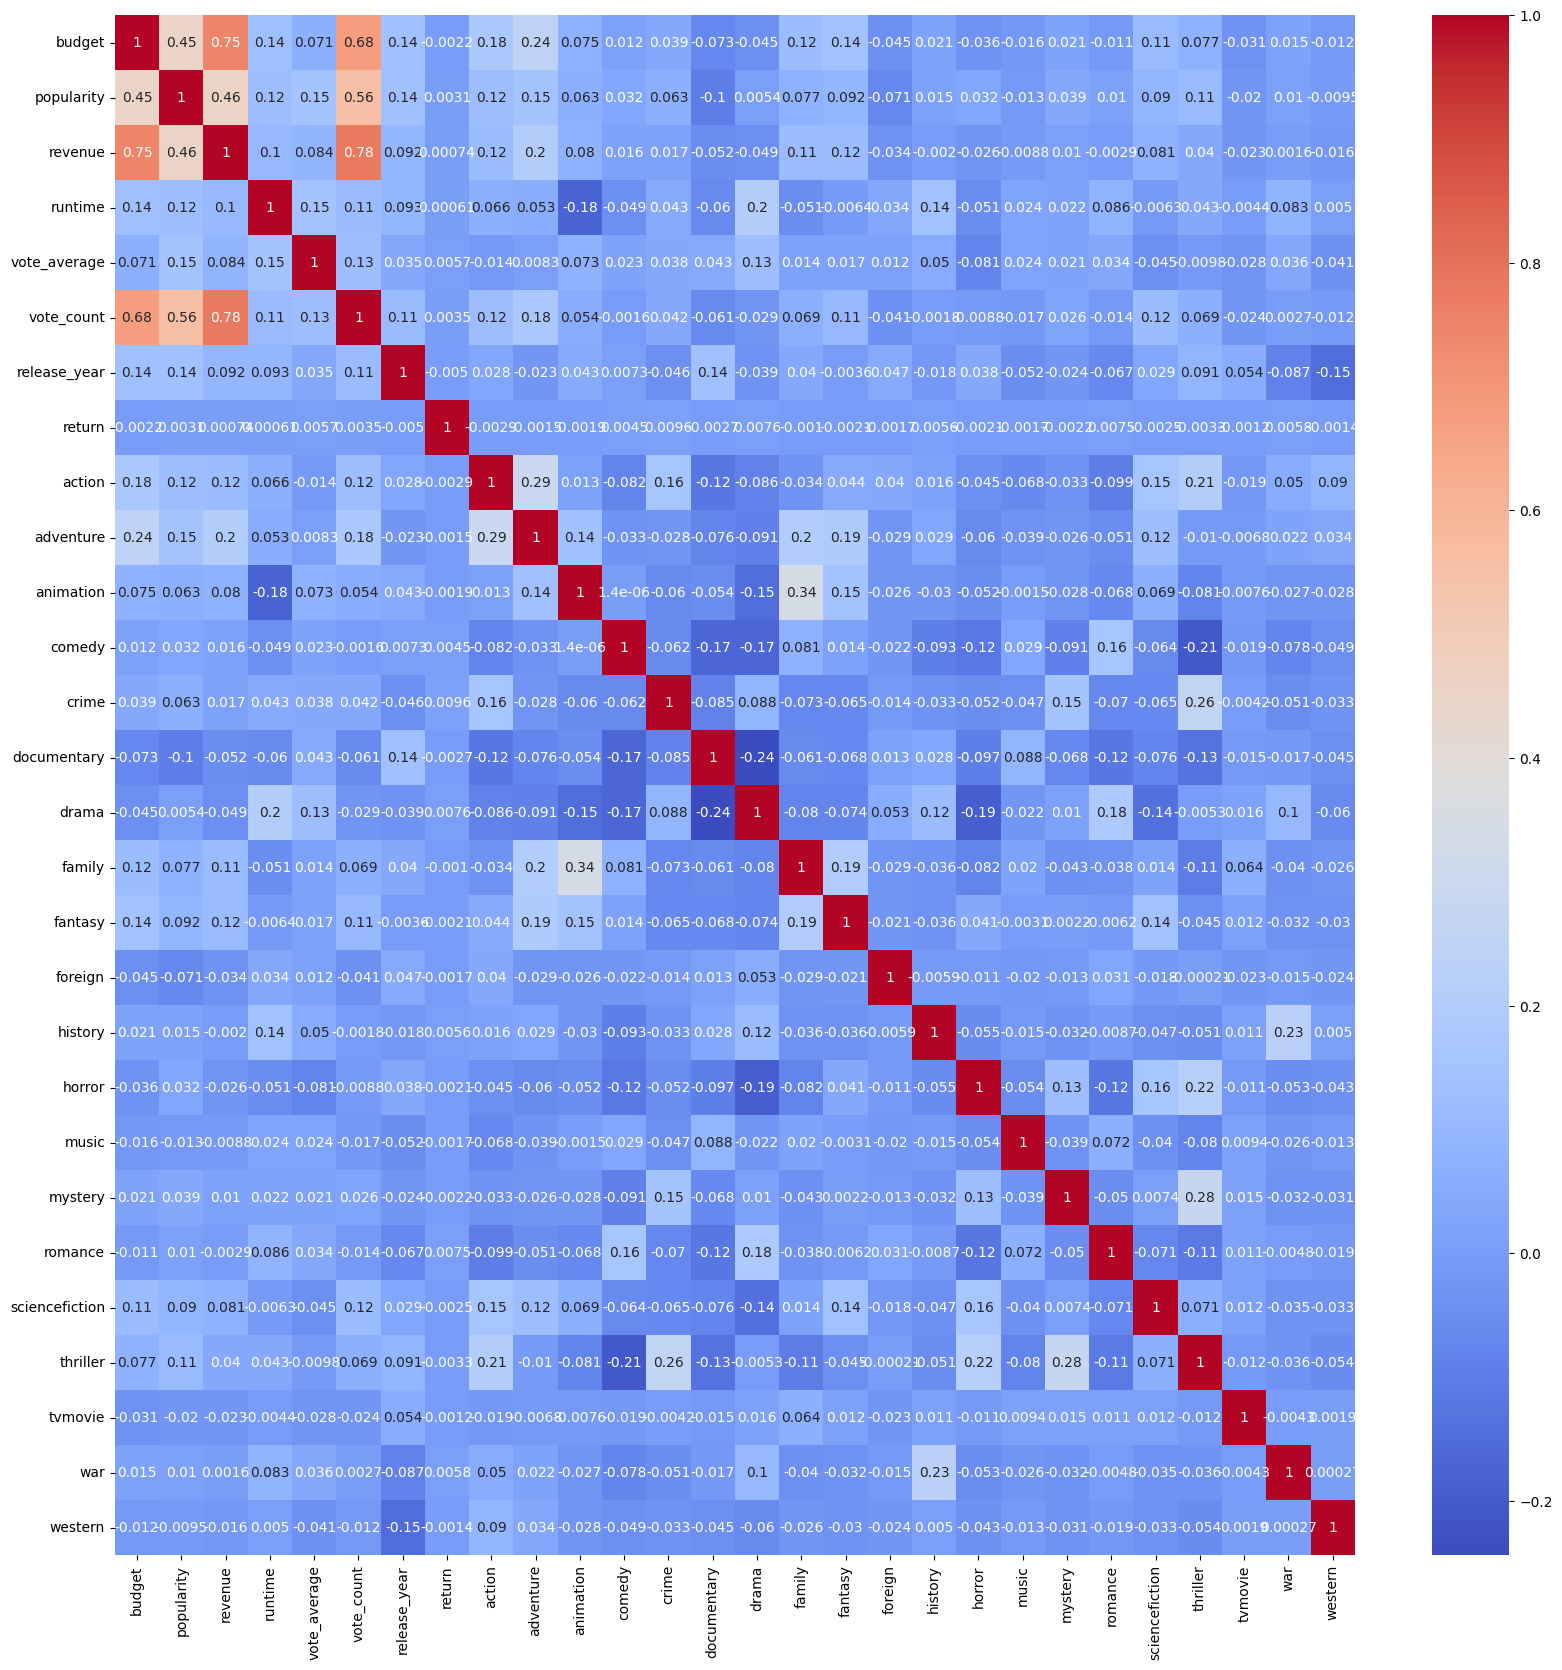

In [29]:
# genero grafico de correlacion
plt.figure(figsize=(20, 20))
sns.heatmap(df_eda_numerico.corr(), annot=True, cmap='coolwarm')
plt.show()


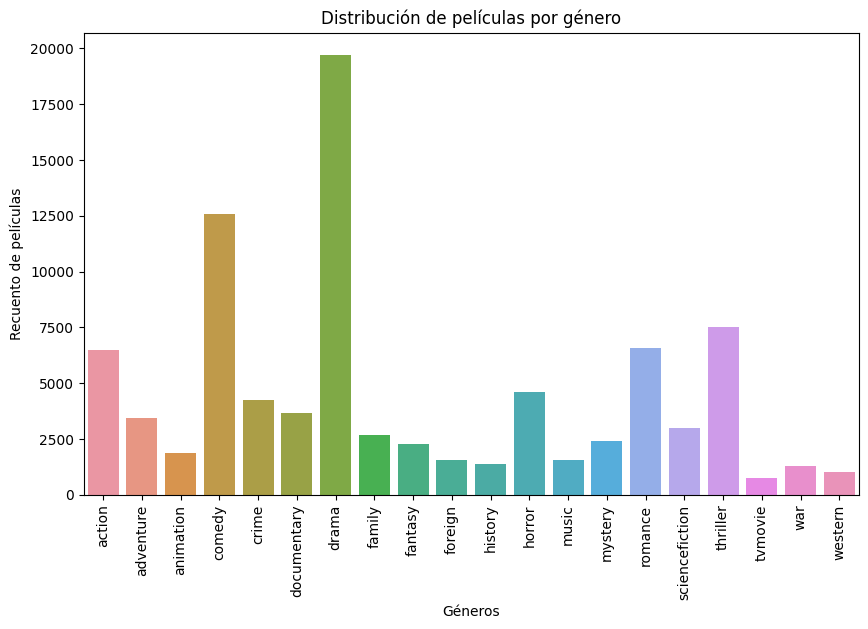

In [30]:
# obtengo nombre de los generos
generos = list(dummies_genre.columns)

# recuento de peliculas por genero
recuento_generos = dummies_genre.sum()

# grafico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=generos, y=recuento_generos)
plt.xlabel('Géneros')
plt.ylabel('Recuento de películas')
plt.title('Distribución de películas por género')
plt.xticks(rotation=90)
plt.show()


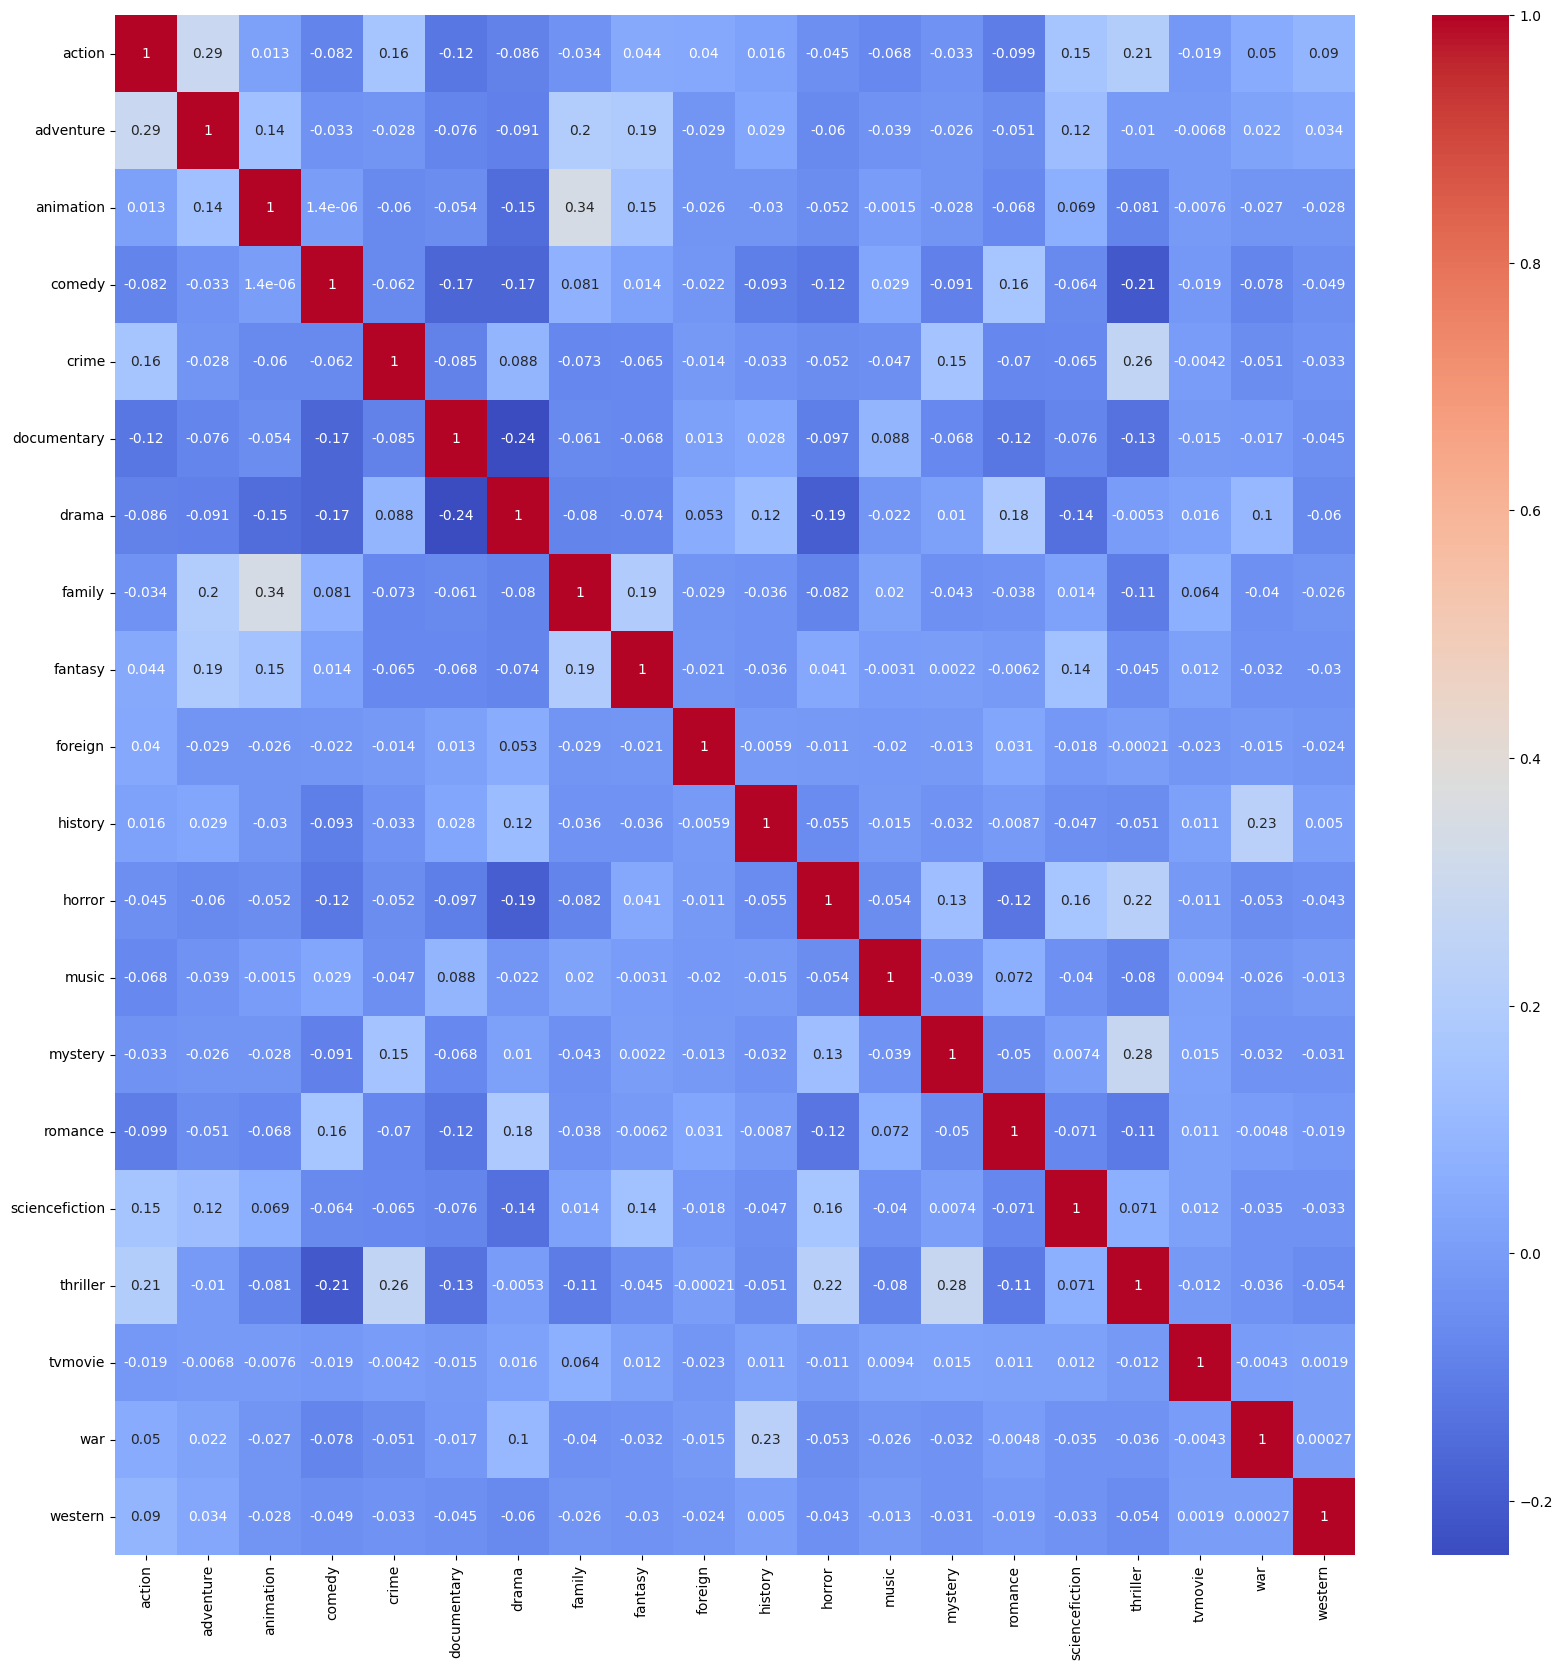

In [31]:
# genero grafico de la relacion entre los generos
plt.figure(figsize=(20, 20))
sns.heatmap(dummies_genre.corr(), annot=True, cmap='coolwarm')
plt.show()


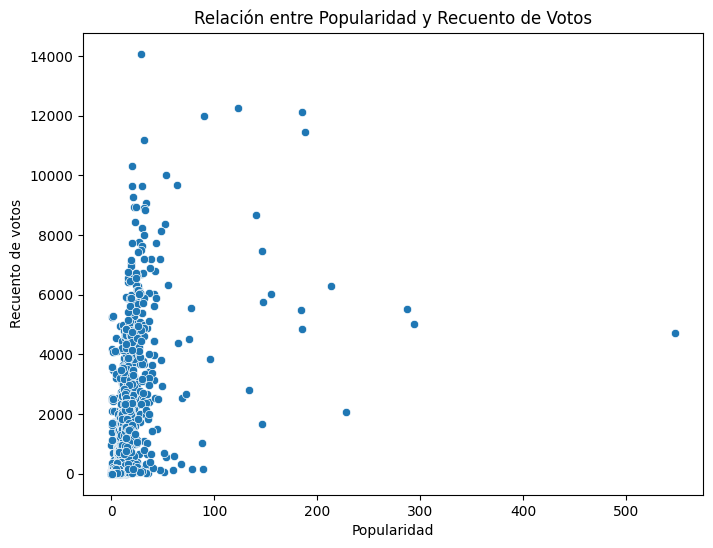

In [32]:
# obtengo popularidad y recuento de votos
popularity = df_eda_numerico['popularity']
vote_count = df_eda_numerico['vote_count']

# rgafico de dispersion
plt.figure(figsize=(8, 6))
sns.scatterplot(x=popularity, y=vote_count)
plt.xlabel('Popularidad')
plt.ylabel('Recuento de votos')
plt.title('Relación entre Popularidad y Recuento de Votos')
plt.show()


<Axes: xlabel='budget', ylabel='revenue'>

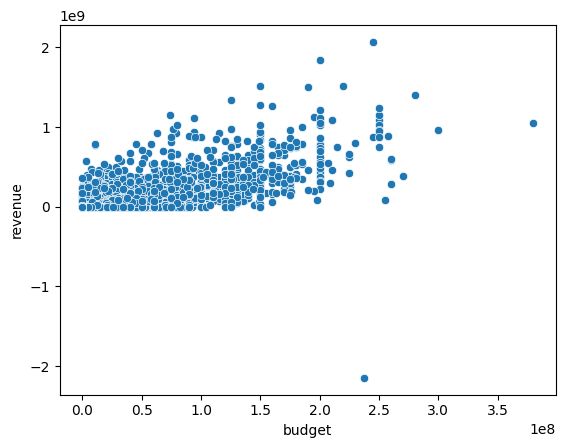

In [51]:
sns.scatterplot(data=df_eda, x='budget', y='revenue')

In [33]:
# Convertir la columna "genres" en listas separadas por comas
df_eda['genres'] = df_eda['genres'].apply(lambda x: ','.join(x))

# Generar dummies a partir de la columna "genres"
df_dummies_genre = df_eda['genres'].str.get_dummies(',')

# Concatenar los dummies de género al DataFrame original
df_combined = pd.concat([df_eda, df_dummies_genre], axis=1)


In [34]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity

# Obtener las columnas relevantes
columnas = ['genres', 'protagonista']

# Crear un objeto MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Aplicar MultiLabelBinarizer a las columnas
features = mlb.fit_transform(df_eda[columnas])

entrada = 'Matrix'

# Calcular la similitud del coseno entre la entrada y el resto de las películas
entrada_index = df_eda[df_eda['title'] == entrada].index[0]  # Obtener el índice de la entrada
entrada_features = features[entrada_index].reshape(1, -1)  # Obtener las características de la entrada

similares = cosine_similarity(entrada_features, features)

# Obtener los índices de las películas más similares
top5similares = similares.argsort()[0][-5:]

# Obtener los títulos recomendados
recomendacion = df_eda.loc[top5similares, 'title'].tolist()

print("Las 5 películas más similares a", entrada, "son:")
for titulo in recomendacion:
    print(titulo)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

columnas = ['genres', 'cast_top3', 'crew_writing']

# Combinar las columnas en una sola columna de texto
df_eda['combined_features'] = df_eda[columnas].apply(lambda x: ' '.join(x), axis=1)

# Crear la matriz de características utilizando CountVectorizer
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(df_eda['combined_features'])

# Calcular la similitud del coseno entre la entrada y el resto de las películas
entrada = "Matrix"
f_entrada = vectorizer.transform([entrada])
similares = cosine_similarity(f_entrada, matrix)

# Obtener los índices de las películas más similares
top5similares = similares.argsort()[0][-5:]

# Obtener los títulos recomendados
recomendacion = df_eda.loc[top5similares, 'title'].tolist()

print("Las 5 películas más similares a Toy Story son:")
for titulo in recomendacion:
    print(titulo)


KeyError: "['cast_top3', 'crew_writing'] not in index"

In [36]:
from sklearn.preprocessing import MultiLabelBinarizer
# Crear una instancia de MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Convertir la lista de cadenas en representación binaria
binary_values = mlb.fit_transform(df_eda['cast_top5'])

# Crear un nuevo DataFrame con las nuevas columnas
binary_df = pd.DataFrame(binary_values, columns=mlb.classes_)

binary_df.head()

KeyError: 'cast_top5'

In [ ]:
binary_df.info()

In [37]:
df_eda = df_eda.join(df_eda["cast_top5"].str.join('|').str.get_dummies())

KeyError: 'cast_top5'

In [38]:
# genero un simplificador para quitar palabras comunes del lenguaje ingles
simplificador = set(stopwords.words('english')) 

# Función para limpiar el texto
def clean_text(text):
    text = text.lower() # Converto a minúsculas
    text = text.translate(str.maketrans('', '', string.punctuation)) # Elimino puntuación
    tokens = word_tokenize(text) # Tokenizar
    tokens = [word for word in tokens if word not in simplificador] # Elimino stopwords
    text = ' '.join(tokens) # Unir tokens
    return text

In [39]:
# Aplico la función
df_eda['overview_simple'] = df_eda['overview'].apply(clean_text) 

In [ ]:
# elimino los números
df_eda['overview_simple'] = df_eda['overview_simple'].str.replace('\d+', '') 

In [ ]:
#elimino columnas que no voy a utilizar
df_eda.drop(['overview'], axis=1, inplace=True)

df_eda.head()

In [ ]:
# Funcion para eliminar palabras duplicadas en una misma fila de la columna overview_simple 
def remove_duplicate_words(row):
    words = row.split()  # Dividir el texto en palabras
    words_unique = list(set(words))  # Convertir a conjunto para eliminar duplicados y luego volver a lista
    
    return ' '.join(words_unique)  # Unir las palabras nuevamente en un solo string

# Aplicar la función a la columna 'overview_simple'
df_eda['overview_simple'] = df_eda['overview_simple'].apply(remove_duplicate_words)

df_eda.head()




In [ ]:
# ellimino palabras con menos de 5 caracteres en la columna overview_simple
df_eda['overview_simple'] = df_eda['overview_simple'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>5]))

df_eda.head()

In [40]:
datos_modelo = df_eda['overview_simple']
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.feature_extraction.text import  CountVectorizer


# selecciono 10000 filas al azar de la columna overview_simple para realizar el modelo
datos_modelo = df_eda.sample(10000, random_state=42)

# Creo el vectorizador
vectorizador = TfidfVectorizer(max_features=1000, stop_words='english') 

# Creo la matriz de términos
matrix = vectorizador.fit_transform(datos_modelo['overview_simple'])



In [41]:
# Obtengo los índices de las películas
indices = pd.Series(df_eda.index, index=df_eda['title']).drop_duplicates()

# función para obtener recomendaciones
def get_recommendations(title, cosine_sim=matrix):
    # Obtengo el índice de la película que coincide con el título
    idx = indices[title]
    
    # Obtengo las puntuaciones de similitud de coseno de todas las películas con esa película
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Ordeno las películas en función de las puntuaciones de similitud de coseno
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Obtengo las puntuaciones de las 10 películas más similares
    sim_scores = sim_scores[1:11]
    
    # Obtengo los índices de las películas
    movie_indices = [i[0] for i in sim_scores]
    
    # Devuelvo las 10 películas más similares
    return df_eda['title'].iloc[movie_indices]

In [44]:

# Obtengo las recomendaciones para la película 'The Dark Knight Rises'
get_recommendations('The Matrix')

Series([], Name: title, dtype: object)

In [45]:
# creo Vectorizer eliminando las palabras que aparecen en el 85% de los documentos y las que aparecen en menos de 5 documentos
vectorizer = TfidfVectorizer(max_df=0.75, min_df=5)


In [46]:
# Ajusto y transformo los datos de la columna de texto
datos_modelo = vectorizer.fit_transform(df_eda['overview_simple'])

In [47]:
from sklearn.decomposition import TruncatedSVD

# Aplicar TruncatedSVD para reducir la dimensionalidad
n_components = 100  # (componentes principales)
svd = TruncatedSVD(n_components=n_components)
datos_modelo_reducido = svd.fit_transform(datos_modelo)


In [48]:
# Creo dataframe con los datos reducidos
datos_modelo_reducido = pd.DataFrame(datos_modelo_reducido, columns=[f'component_{i+1}' for i in range(n_components)])

datos_modelo_reducido.head()   

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_91,component_92,component_93,component_94,component_95,component_96,component_97,component_98,component_99,component_100
0,0.035633,-0.000646,-0.001466,-0.010187,-0.005288,-0.001291,-0.000764,-0.001712,0.003002,-0.002541,...,-0.015488,-0.012582,-0.000742,-0.011125,-0.000892,-0.001301,0.003194,-0.005769,0.004790,-0.006220
1,0.093927,-0.001699,0.006588,-0.058106,0.048813,0.005552,0.017501,0.009504,0.011431,0.011358,...,0.037026,0.000683,0.029906,0.038306,0.016247,-0.037022,-0.012596,-0.055664,-0.032056,0.063953
2,0.062873,-0.001853,-0.015059,-0.019497,-0.028627,-0.014656,0.028750,-0.032487,-0.029168,-0.010324,...,-0.013928,0.030540,-0.005687,0.010123,-0.010898,-0.017250,-0.018592,0.016981,0.012204,-0.015601
3,0.079951,-0.001841,-0.031283,-0.004161,0.024693,-0.011289,-0.035319,-0.017646,0.031256,-0.012699,...,-0.032723,-0.010966,0.015293,-0.004645,0.014820,-0.016031,-0.007654,-0.003372,0.024016,-0.004225
4,0.069024,-0.001635,-0.025313,-0.016009,-0.029629,-0.024801,0.012060,-0.025840,-0.003411,-0.022063,...,0.000866,-0.023924,0.005753,0.003168,0.014033,-0.013801,-0.041737,-0.002519,0.010825,0.004251


In [49]:
# función para obtener recomendaciones
def get_recommendations(title, cosine_sim=cosine_sim):
    # Obtener el índice de la película que coincide con el título
    idx = df_eda[df_eda['title'] == title].index[0]

    # Obtener las puntuaciones de similitud de pares ordenados con todas las películas
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Ordenar las películas en función de las puntuaciones de similitud
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Obtener las puntuaciones de las 10 películas más similares
    sim_scores = sim_scores[1:11]

    # Obtener los índices de las películas
    movie_indices = [i[0] for i in sim_scores]

    # Devolver las 10 películas más similares
    return df_eda['title'].iloc[movie_indices]

# Prueba de la función
get_recommendations('Toy Story')

NameError: name 'cosine_sim' is not defined